<h1>Банки — Сегментация пользователей по потреблению<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичное-знакомство" data-toc-modified-id="Первичное-знакомство-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичное знакомство</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Сегментация-данных" data-toc-modified-id="Сегментация-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сегментация данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод-и-рекомендации" data-toc-modified-id="Вывод-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод и рекомендации</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Презентация</a></span></li><li><span><a href="#Дашборд" data-toc-modified-id="Дашборд-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Дашборд</a></span></li></ul></div>


**Цель: проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток. Дополнительно проверить поведение клиентов с учетом баланса на счетах и зарплаты**

**План исследования:**

**1.  Первичное знакомство**

  1.1. Изучение колонок
- `userid` — уникальный номер клиента,
- `score` — баллы кредитного скоринга,
- `сity` — город,
- `gender` — пол,
- `age` — возраст,
- `objects` — количество объектов в собственности,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `creditCard` — есть ли кредитная карта,
- `loyalty` — отточный или активный клиент,
- `estimated_salary` — заработная плата клиента,
- `churn` - ушёл или нет

  1.2. Загрузка библиотек

**2. Преобработка данных**
- пропуски: содержатся только в колонке balance (баланс на счёте). Пропуски заполнять не будем, так как нет цели построить модель и при работе с данными пустые значения мешать не будут. При этом планирую при построении графиков учитывать данный столбец, заполнение пропусков может исказить результаты/выводы и нагрузить код. Скорей всего пропуски связаны с нулевыми значениями на балансе и наличием только кредитных продуктов (итак должны банку), не исключаю и сбои в момент загрузки из соответствующей таблицы
- дубликаты: отсутствуют
- регистр: привести все столбцы к нижнему регистру для удобства работы и аккуратности визуала/кода
- аномальные/отрицательные значения: отсутствуют
- новые столбцы: добавить столбцы для дальнейшей сегментации/анализа
  
    a) балансы на счетах - macc (среднестатистический клиент), премиум (клиент доверяет банку) и вип (клиент располагает ресурсами и доверяет банку)
  
    b) возрастной диапазон


**3. Исследовательский анализ данных**

Построить информативные графики саплот и корреляции по географии, полу и сегментам выше, обращая особое внимание на отток и описать промежуточные выводы

**4. Сегментация данных**

Проанализировать новые столбцы, которые были добавлены для сегментации и описать промежуточные выводы


**5. Проверка гипотез**

Первая гипотеза: проверить гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Вторая гипотеза: проверить гипотезу различия по среднему кол-ву потребляемых продуктов между сегментами по гендерному признаку

Будет использован Z-тест

**6. Выводы и рекомендации**

Описать итоговые выводы, которые помогут определиться со стратегией банка и маркетинговыми акциями, а также, возможно, будут полезны для внедрения новых управленческих или мотивационных метрик/таргетов

## Первичное знакомство

In [1]:
%pip install -U kaleido -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install plotly --upgrade

     |████████████████████████████████| 15.3 MB 1.9 MB/s eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.4.0
    Uninstalling plotly-5.4.0:
      Successfully uninstalled plotly-5.4.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install phik

     |████████████████████████████████| 709 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
#загрузила библиотеки
import pandas as pd
import datetime as dt
import numpy as np
from scipy import stats as st
import phik
import matplotlib.pyplot as plt
import math as mth
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default="png"
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [5]:
#загрузила датафрейм
try:
    data = pd.read_csv('/datasets/bank_dataset.csv')
except:
    data = pd.read_csv(r"C:\scripts\bank_dataset.csv")

In [6]:
#посмотрела 20 первых строк
data.head(20)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


## Предобработка данных

In [7]:
#посмотрела информацию по колонкам
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
#проверила на пропуски
data.isna().sum()

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

In [9]:
print ('Кол-во пропусков в столбце balance -', data['Balance'].isna().sum(), ',', round(data['Balance'].isna().sum()/data['userid'].count()*100, 2), '%')

Кол-во пропусков в столбце balance - 3617 , 36.17 %


Пропуски только в поле balance (баланс на счете). В количестве 3617 шт, потеря данных составляет - 36%.
Пропуски заполнять не будем, так как нет цели построить модель и при работе с данными пустые значения мешать не будут. При этом планирую при построении графиков учитывать данный столбец, заполнение пропусков может исказить результаты/выводы и нагрузить код. Скорей всего пропуски связаны с нулевыми значениями на балансе и наличием только кредитных продуктов (итак должны банку), не исключаю и сбои в момент загрузки из соответствующей таблицы

In [10]:
#постаралась определить причины пропусков
def summary(x):
    result = {
        'count_nan': x['Balance'].isna().sum(),
    }
    return pd.Series(result)

In [11]:
data.groupby(['City']).apply(summary)

,count_nan
City,
Ростов Великий,0
Рыбинск,1199
Ярославль,2418


In [12]:
data.groupby(['Gender']).apply(summary)

,count_nan
Gender,
Ж,1654
М,1963


In [13]:
data.groupby(['Churn']).apply(summary)

,count_nan
Churn,
0,3117
1,500


In [14]:
#проверила на дубликаты
print ('Кол-во дубликатов -', data.duplicated().sum())

Кол-во дубликатов - 0


Дубликаты отсутствуют

In [15]:
#привела столбцы к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Привела все столбцы к нижнему регистру для удобства работы и аккуратности визуала/кода

In [16]:
#проверила на аномальные/отрицательные значения
data.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Аномальные/отрицательные значения отсутствуют

In [17]:
#добавила столбец для сегменации по балансам на счетах
def categorize_balance(row):
    try:
        if 0 <= row <= 150000:
            return 'macc'
        elif 150001 <= row <= 200000:
            return 'премиум'
        elif row >= 200001:
            return 'вип'
    except:
        return 'данные отсутствуют'

data.insert(7, 'categorу_client_balance', data['balance'].apply(categorize_balance), True)
data.head()

,userid,score,city,gender,age,objects,balance,categorу_client_balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,None,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,macc,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,премиум,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,None,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,macc,1,1,1,79084.10,0


In [18]:
#добавила столбец для сегментации по возрастному диапазону
def categorize_age(row):
    try:
        if 18 <= row <= 25:
            return '18-25'
        elif 26 <= row <= 35:
            return '26-35'
        elif 36 <= row <= 45:
            return '36-45'
        elif row >= 46:
            return '45+'
    except:
        pass

data.insert(5, 'categorу_client_age', data['age'].apply(categorize_age), True)
data.head()

,userid,score,city,gender,age,categorу_client_age,objects,balance,categorу_client_balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,36-45,2,NaN,None,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,36-45,1,83807.86,macc,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,36-45,8,159660.80,премиум,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,36-45,1,NaN,None,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,36-45,2,125510.82,macc,1,1,1,79084.10,0


Добавила новые столбцы для сегментации и дальнейшего анализа:
  
    a) балансы на счетах - macc (среднестатистический клиент), премиум (клиент доверяет банку) и вип (клиент располагает ресурсами и доверяет банку)
  
    b) возрастной диапазон

**Промежуточный вывод**
- Пропуски только в поле balance (баланс на счете). В количестве 3617 шт, потеря данных составляет - 36%. Заполнять не будем, так как нет возможности посчитать достоверные значения
- Дубликаты/Аномальные/Отрицательные значения отсутствуют

## Исследовательский анализ данных

Проверила сегменты, обращая внимание на отток:
1. по географическому признаку, учитывая среднее кол-во продуктов, баланс и зп (зарплата)
2. по гендерному признаку, учитывая среднее кол-во продуктов, баланс и зп (зарплата)
3. по возрастному диапазону, учитвая среднее кол-во продуктов, баланс и зп (зарплата)

Также проверила:
1. отток по географическому, гендерному, возрастному признаку, а также по кол-ву продуктов
2. общее распределение по кол-ву потребляемых продуктов
3. корреляцию по всему датасету

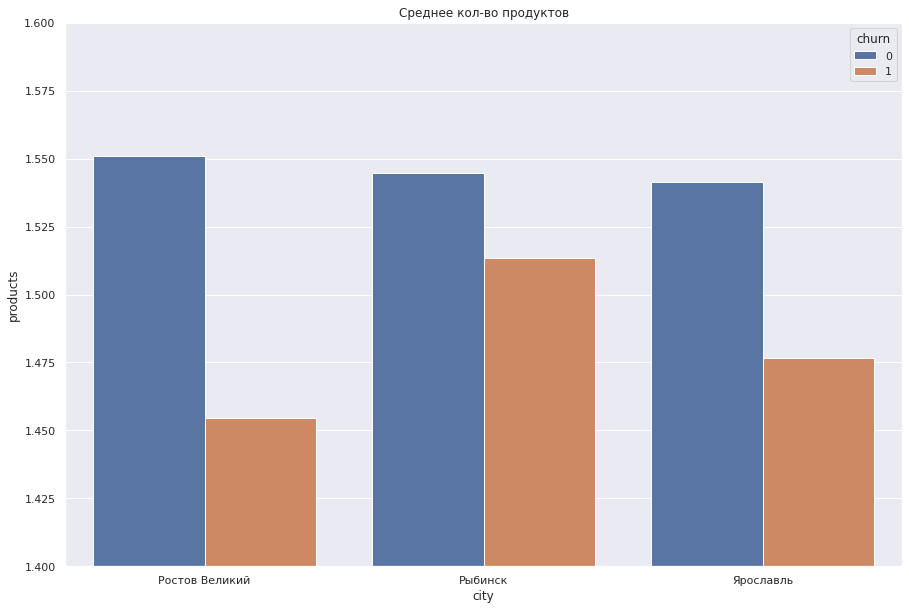

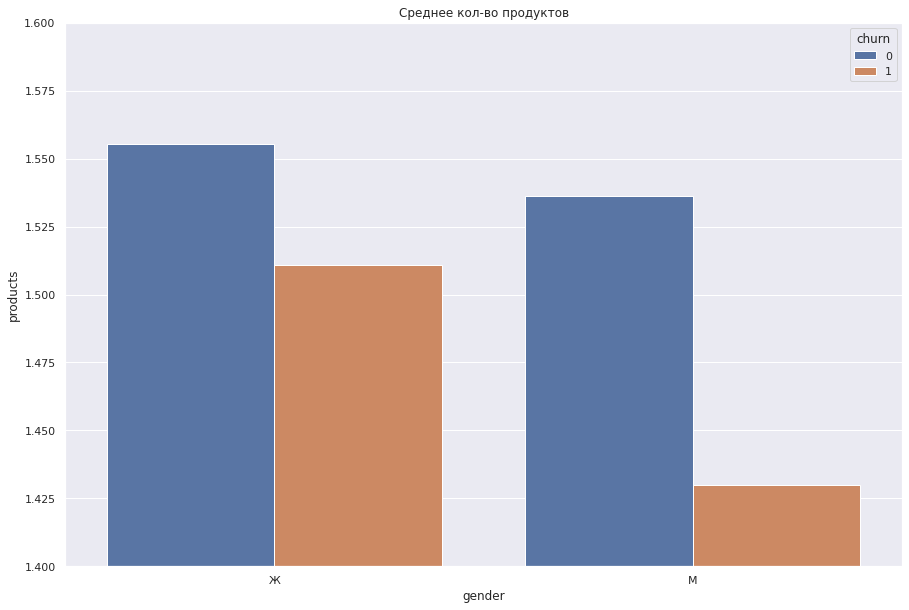

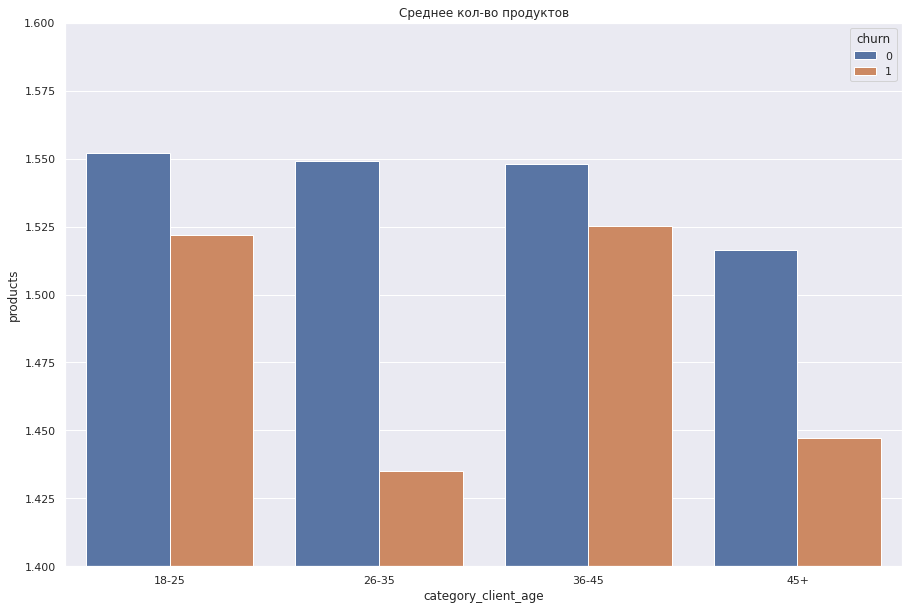

In [19]:
#построила столбчатую диаграмму по среднему кол-ву продуктов (метод bar по городам, полу и возрастному диапазону)
list = ['city', 'gender', 'categorу_client_age']
    
for row in list:
    df_avg_products = (
    data.groupby([row, 'churn'], as_index=False)['products']
    .agg('mean')
    .sort_values(by='products', ascending=False)
    )
    sns.barplot(data=df_avg_products, x=row, y='products', hue='churn')
    plt.title('Среднее кол-во продуктов')
    plt.ylabel('products')
    plt.ylim(1.4, 1.6)
    plt.show()

Среднее кол-во продуктов больше: 
- по активным клиентам в городе Ростов Великий, а по показателю total - Рыбинск
- у женского пола
- лучше всего себя показывает возрастная категория 18-25 и 36-45
- графики показывает прямую связь между оттоком и кол-во продуктов, то есть мы теряем клиентов в связи с низким средним проникновением продуктов по каждому сегменту

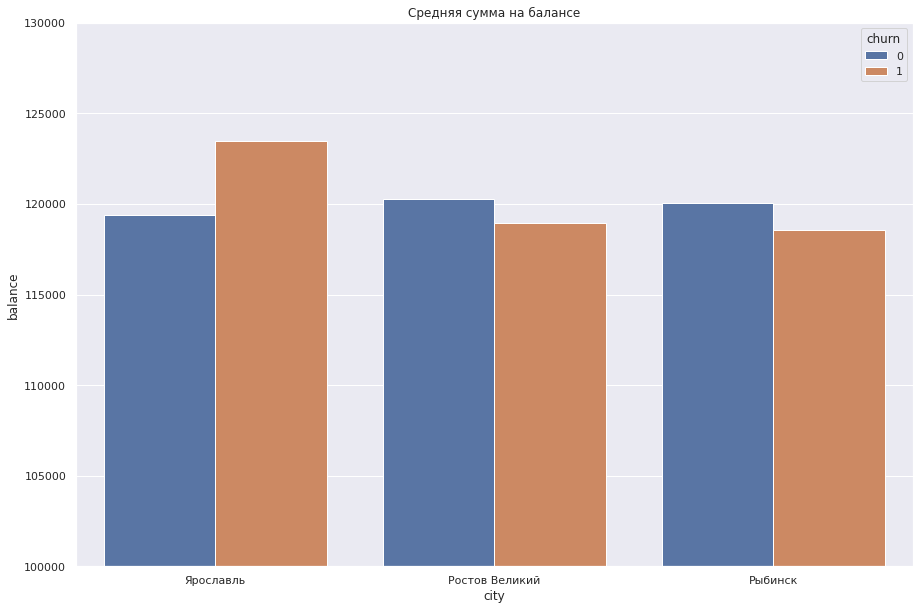

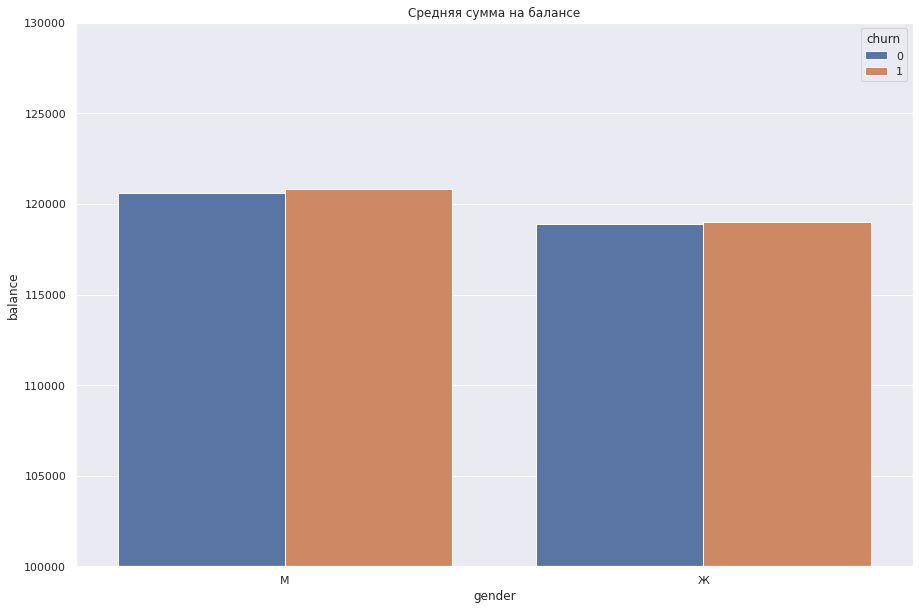

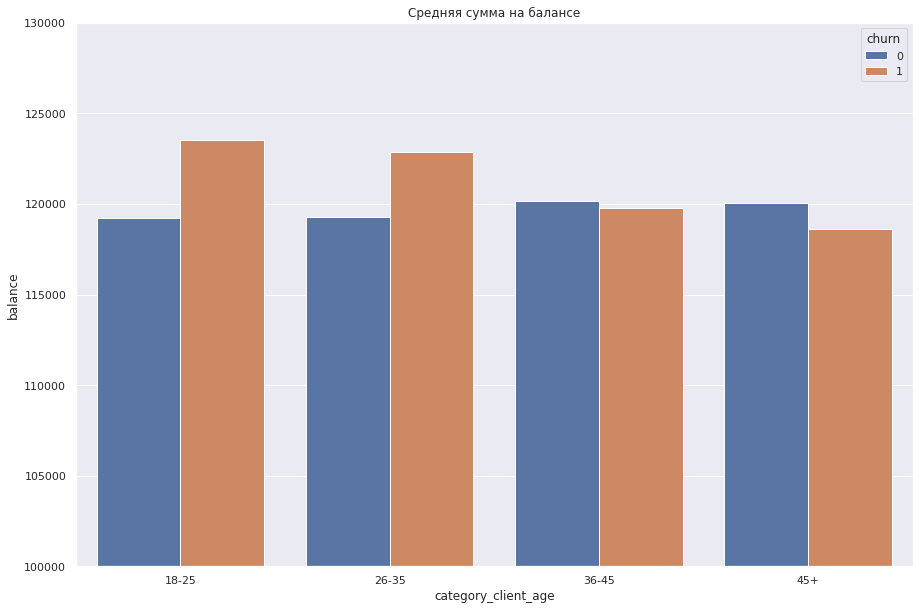

In [20]:
#построила столбчатую диаграмму по средним балансам на счетах (метод bar по городам, полу и возрастному диапазону)
list = ['city', 'gender', 'categorу_client_age']
    
for row in list:
    df_avg_balance = (
    data.groupby([row, 'churn'], as_index=False)['balance']
    .agg('median')
    .sort_values(by='balance', ascending=False)
    )
    sns.barplot(data=df_avg_balance, x=row, y='balance', hue='churn')
    plt.title('Средняя сумма на балансе')
    plt.ylabel('balance')
    plt.ylim(100000, 130000)
    plt.show()

Средний баланс клиента больше: 
- в городе Ярославль
- у мужского пола
- лучше всего себя показывает возрастная категория 18-25 и 26-35
- набор графиков показывает, что от нас уходят клиенты, у которых средняя сумма на счетах была больше

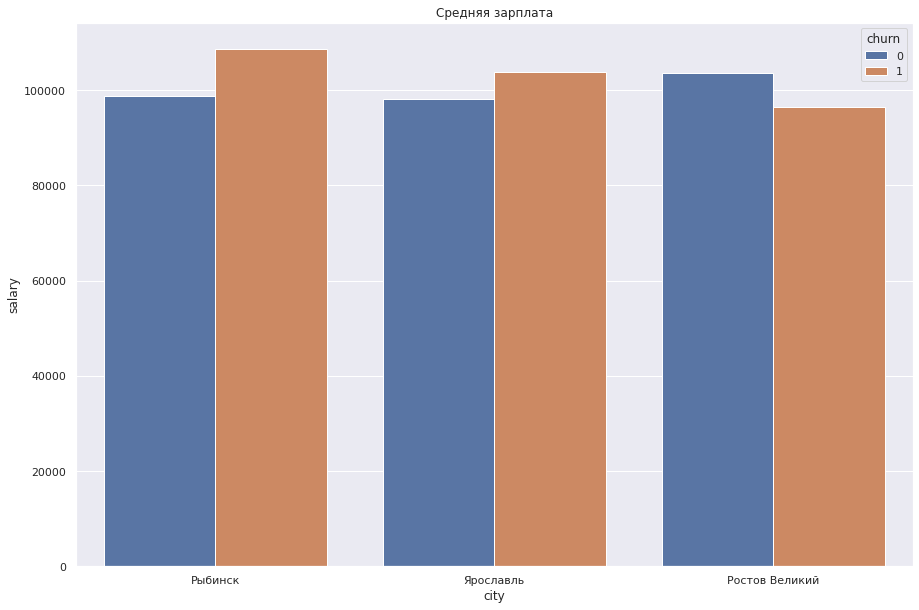

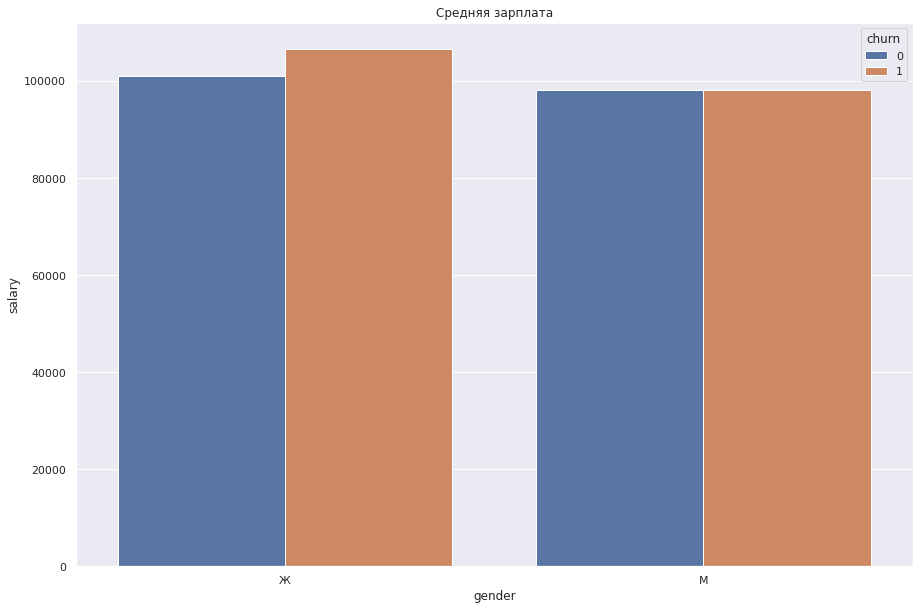

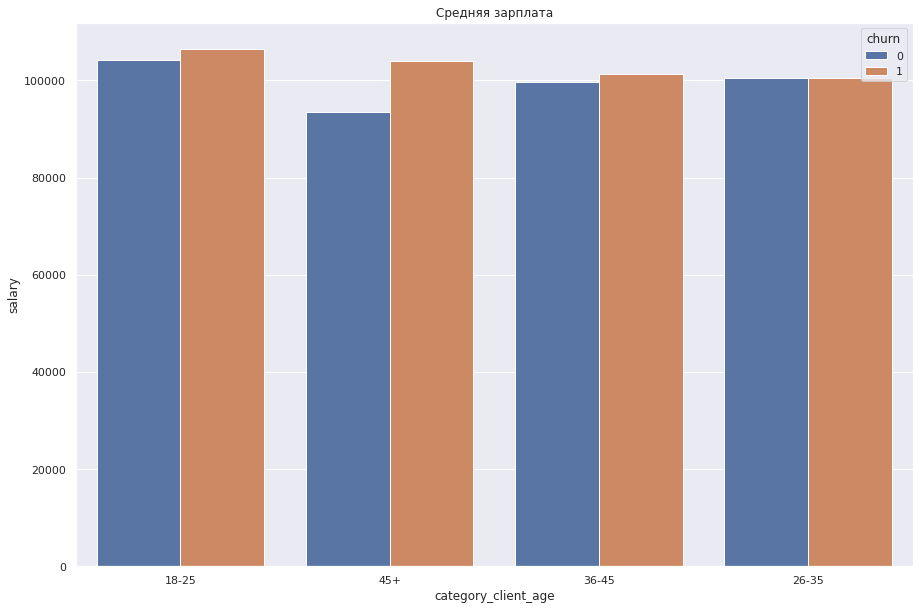

In [21]:
#построила столбчатую диаграмму по средней зарплате (метод bar по городам, полу и возрастному диапазону)
list = ['city', 'gender', 'categorу_client_age']
    
for row in list:
    df_avg_salary = (
    data.groupby([row, 'churn'], as_index=False)['estimated_salary']
    .agg('median')
    .sort_values(by='estimated_salary', ascending=False)
    )
    sns.barplot(data=df_avg_salary, x=row, y='estimated_salary',  hue='churn')
    plt.title('Средняя зарплата')
    plt.ylabel('salary')
    plt.show()

Средняя зарплата больше:
- в городе Рыбинск
- у женского пола
- лучше всего себя показывает возрастная категория 18-25 и 26-35
- уже второй набор графиков показывает, что от нас уходят более качественные клиенты

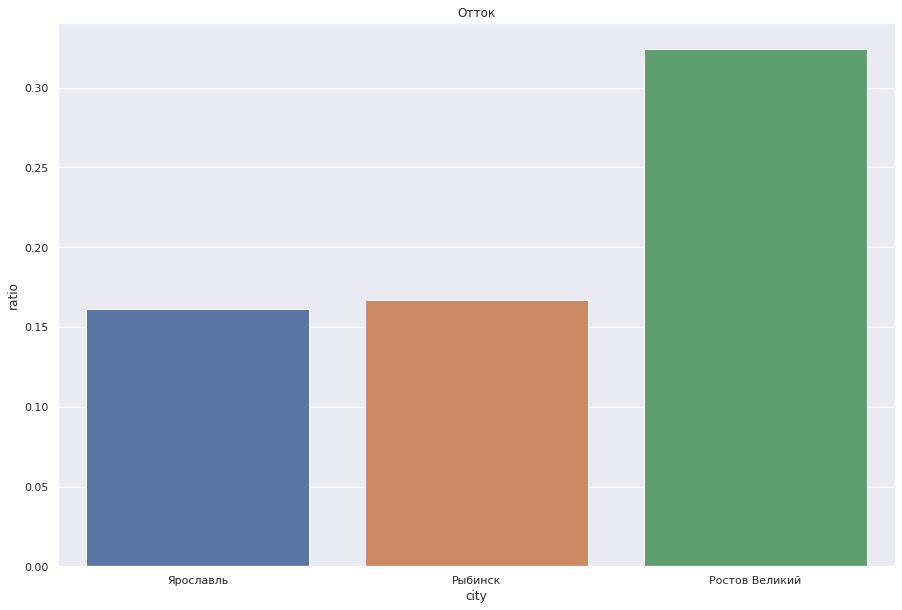

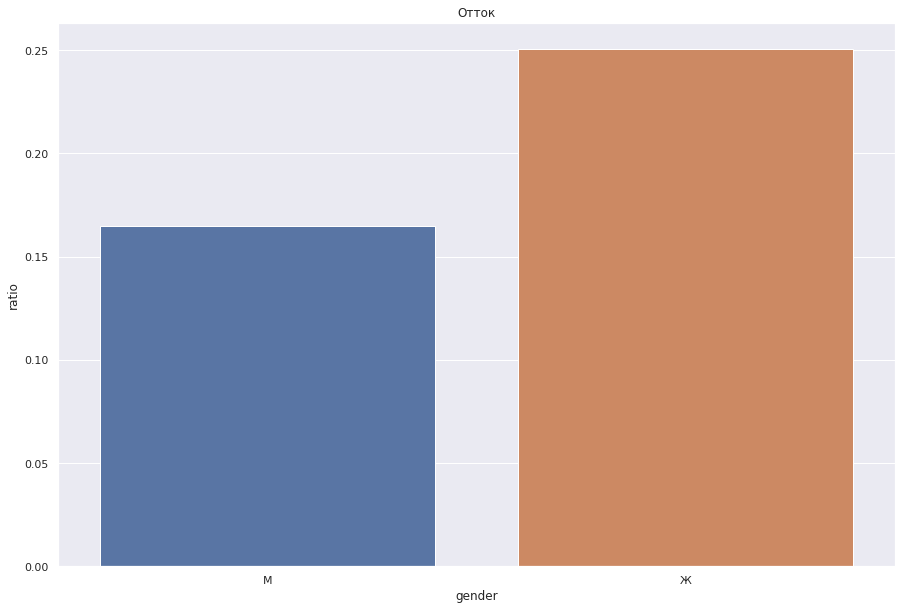

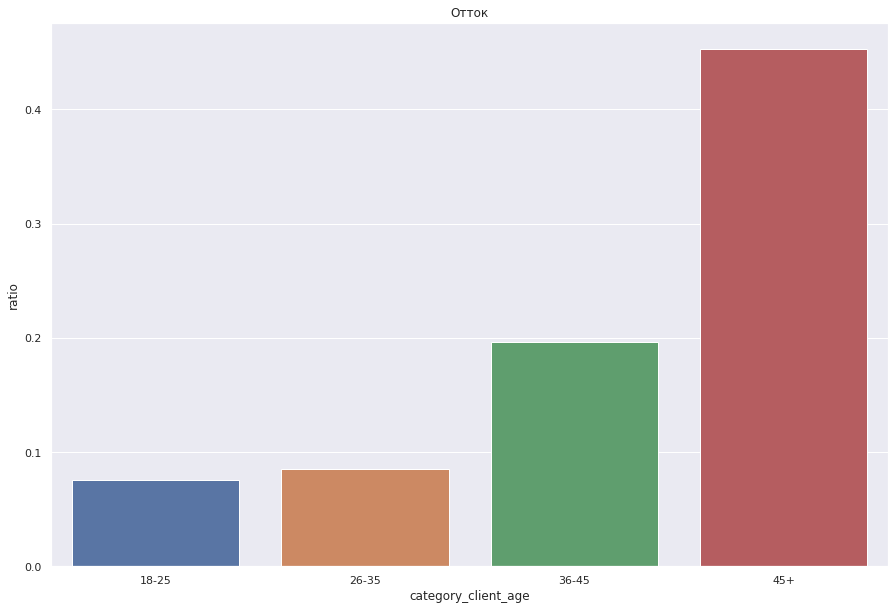

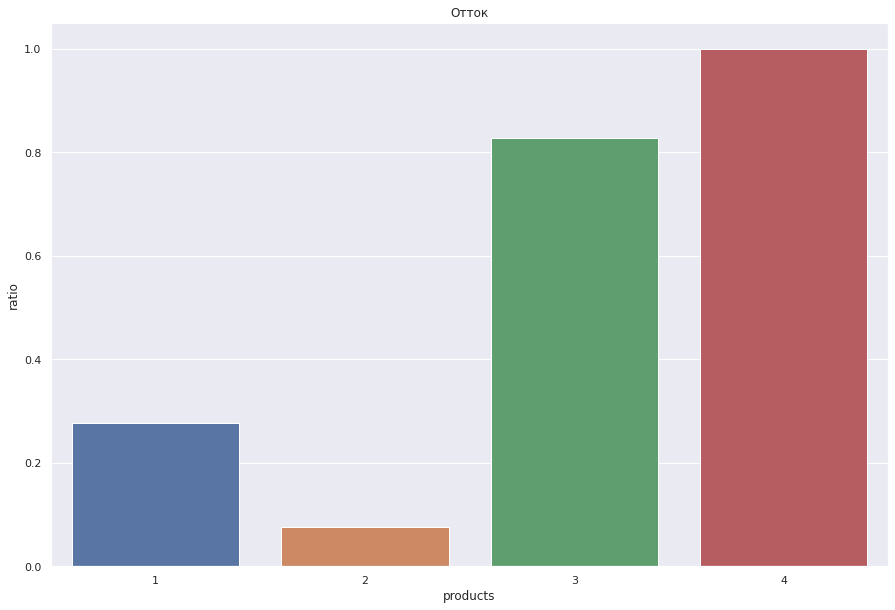

In [22]:
#посмотрела % оттока по географии, гендерному признаку, возрастному диапазону и кол-ву продуктов
list = ['city', 'gender', 'categorу_client_age', 'products']

for row in list:
    data_churn = (
        data.query('churn == 1')
        .pivot_table(index=row, values='churn', aggfunc='count')
        .reset_index()
    ) 
    data_total = data.pivot_table(index=row, values='churn', aggfunc='count').reset_index()
    data_ratio_churn = data_churn.merge(data_total, on=row, how='left')
    data_ratio_churn.columns = [row, 'cnt_churn', 'cnt_total']
    data_ratio_churn['ratio'] = data_ratio_churn['cnt_churn']/data_ratio_churn['cnt_total']
    data_ratio_churn = data_ratio_churn.sort_values(by='ratio')
    sns.barplot(x=row, y='ratio', data=data_ratio_churn)
    plt.title('Отток')
    plt.show()

Менее отточные клиенты:
1. в городе Ярославль
2. у мужского пола
3. лучше всего себя показывает возрастная категория 18-25 и 26-35
4. с 1 и 2 продуктами

Отточные клиенты:
1. в городе Ростов Великий
2. у женского пола
3. возрастная категория 35-45 и 45+
4. у 3 и 4 продуктов отток достигает 80% и 100%

In [23]:
#проверила, в каких городах концентрация клиентов с 3 и 4 продуктами
data.query('products >= 3').groupby('city')['products'].count()

city
Ростов Великий    120
Рыбинск            73
Ярославль         133
Name: products, dtype: int64

Изначально было предположение, что в Ростове Великом самая большая концентрация клиентов с 3 и 4 продуктами, так как там высокое среднее проникновение продуктов и значительный отток.

Гипотеза не подтвердилась

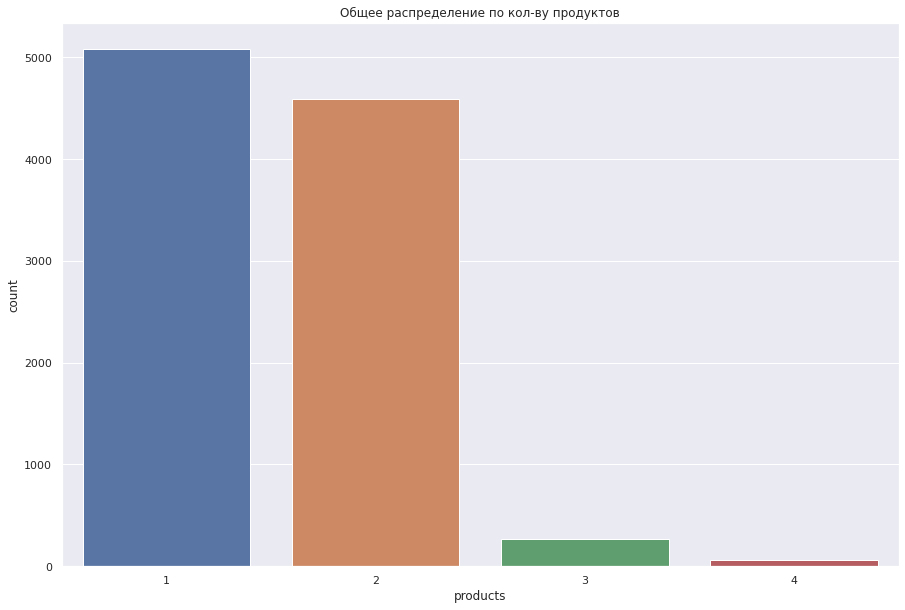

In [24]:
#общее распределение по кол-ву продуктов
data_cnt_products = data.groupby('products')['userid'].count().reset_index()
sns.barplot(data=data_cnt_products, x='products', y='userid')
plt.title('Общее распределение по кол-ву продуктов')
plt.xlabel('products')
plt.ylabel('count')
plt.show()

Самое распространенное значение - 1 и 2 продукта

interval columns not set, guessing: ['userid', 'score', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn']


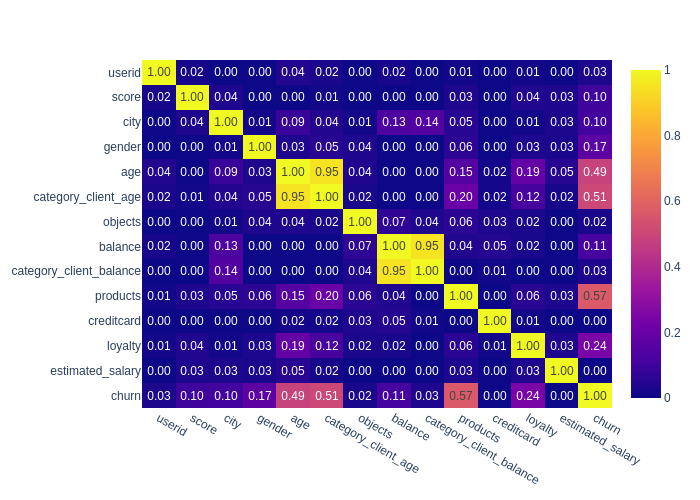

In [25]:
#посмотрела корреляцию
fig = px.imshow(data.phik_matrix(), text_auto='.2f', aspect='auto')
fig.show()

На кол-во потребляемых продуктов влияет:
1. Город
2. Возраст
3. Отток клиентов
    
На отток влияет: 
1. Пол
2. Возраст
3. Кол-во продуктов

**Промежуточный вывод**

- самое большое среднее значение потребляемых продуктов в городе Рыбинск, в Ростове Великом хорошее проникновение продуктов по активным клиентам, при этом высокий % оттока. В Ярославле активно используют счет (баланс), но история более распространена по отточным клиентам, значит в нашем случае использовали счет
- самая топовая возрастная категория 18-25 и 26-35 - высокое среднее кол-во потребляемых продуктов и менее отточная категория, но оттекают качественные клиенты с значительными балансами на счетах и зарплатами. Отточные 36-45 и 45+
- самое распространенное значение - 1 и 2 продукта и менее отточная категория, но очень высокая доля оттекших клиентов с 3 и 4 продуктами, возможно, ошибка в данных. Кол-во клиентов с 3 и 4 продуктам незначительное. 
- женский пол больше потребляет продукты банка, но и отточнее, мужской - более стабильный
- можно выделить 2 сегмента, которые влияют на кол-во потребляемых продуктов: география и возраст
- можно выделить 3 сегмента, которые влияют на отток: пол, возраст и кол-во продуктов

## Сегментация данных

Выделила два сегмента по кол-ву потребляемых продуктов:
1. география
2. возраст

Построила линейные графики по сегментам выше и графики распределения, а также проверила проникновение кредитных карт

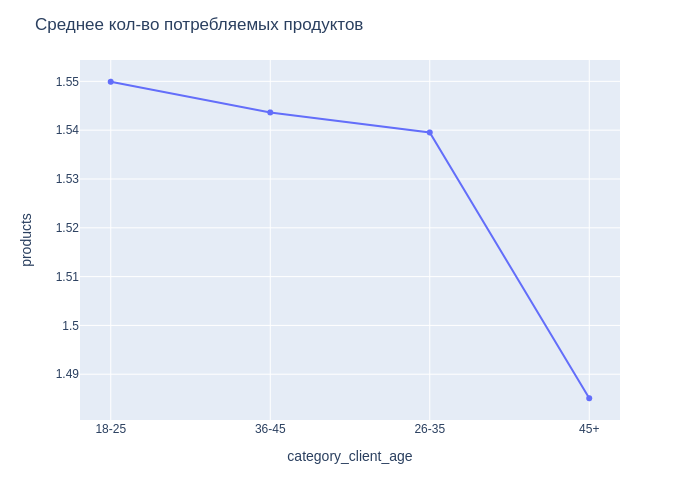

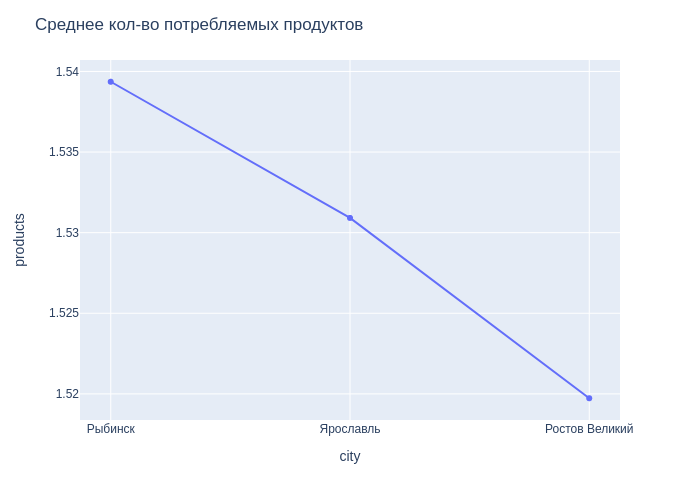

In [26]:
list = ['categorу_client_age', 'city']

for row in list:
    df_avg_products2 = (
    data.groupby(row, as_index=False)['products']
    .agg('mean')
    .sort_values(by='products', ascending=False)
    )
    fig = px.line(df_avg_products2, x=row, y='products', markers=True)
    fig.update_layout(title='Среднее кол-во потребляемых продуктов')
    fig.show()

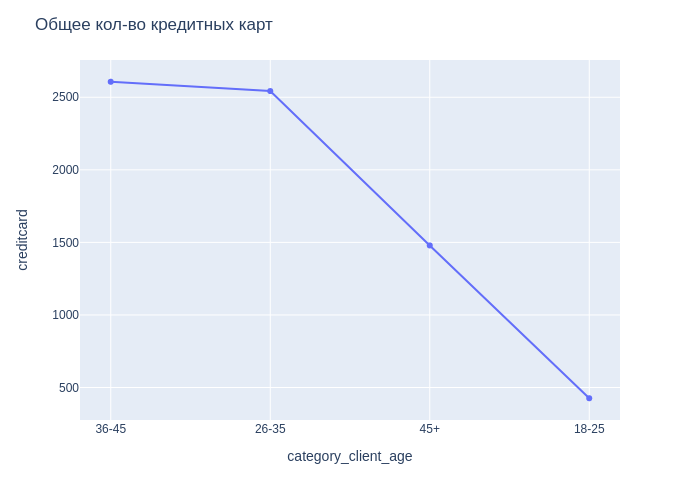

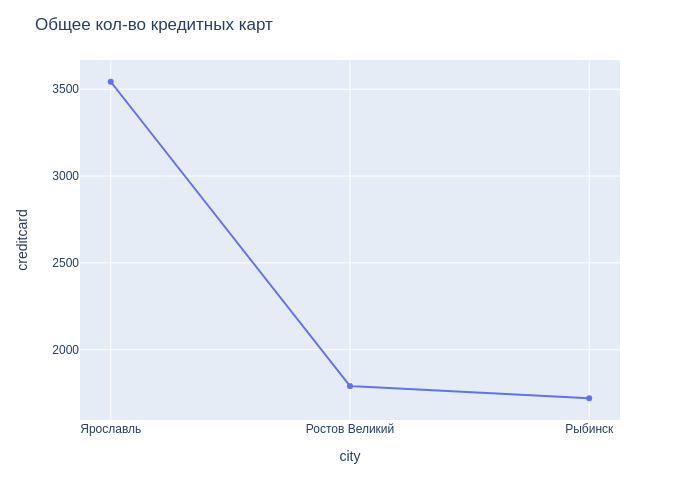

In [27]:
list = ['categorу_client_age', 'city']

for row in list:
    df_creditCard = (
    data.groupby(row, as_index=False)['creditcard']
    .agg('sum')
    .sort_values(by='creditcard', ascending=False)
    )
    fig = px.line(df_creditCard, x=row, y='creditcard', markers=True)
    fig.update_layout(title='Общее кол-во кредитных карт')
    fig.show()

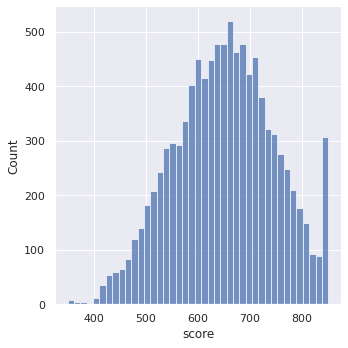

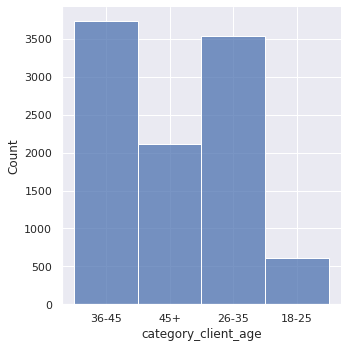

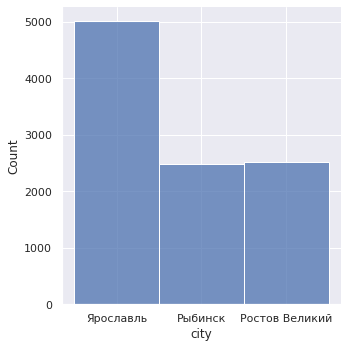

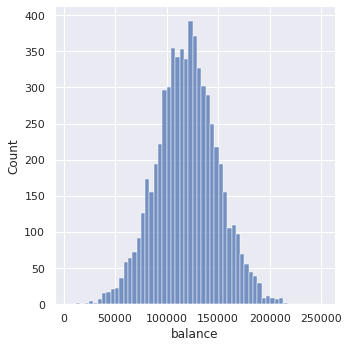

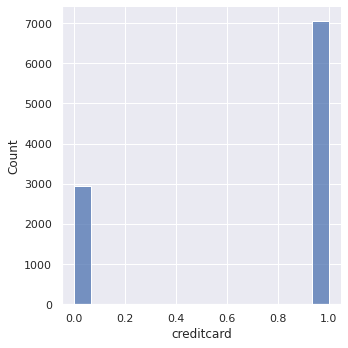

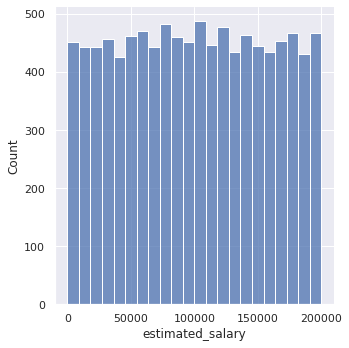

In [28]:
#построила график распределения по возрастному диапазону и географии
list= ['score', 'categorу_client_age', 'city', 'balance', 'creditcard', 'estimated_salary']

for row in list:
    sns.displot(data[row])
    plt.show()

**Промежуточный вывод:**
1. Как и ранее было озвучено, стабильные города Рыбинск и Ярославль, наилучший возраст - 18-25 и 26-35. Вывод сформирован с учетом ранее проанализированного признака отток
2. Была гипотеза, что на кол-во потребляемых продуктов влияет наличие кредитной карты, не подтвердилось. Так как по кредитным картам в топе город Ярославль и возрастная категория 36-45
3. Определила основные сегменты: География и Возраст (18-25, 26-35, 36-45 и 45+). Не стала рассматривать сегменты - по скорнгу, балансам и зп, хотя можно было и разделить, так как нет прямой корреляции с кол-вом потребляемых продуктов. А моя цель сегментировать клиентов по кол-ву потребляемых продуктов. Как я понимаю у сегментов должна быть корреляция с продуктами, чтобы в дальнейшем правильно оценить эффект внедренных изменений/рекомендаций

## Проверка гипотез

H_0: Средний доход клиента, у которого 1 продукт = Среднему доходу клиента, у которого 2 продукта

H_1: Средний доход клиента, у которого 1 продукт ≠ Среднему доходу клиента, у которого 2 продукта
alpha = 0.05

In [29]:
one_products = data['estimated_salary'].loc[data['products'] == 1]
two_products = data['estimated_salary'].loc[data['products'] == 2]

results = st.ttest_ind (one_products, two_products, equal_var = False)

alpha = .05

print (results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


Доходы клиентов не различаются от кол-ва потребляемых продуктов

H_0: Среднее кол-во потребляемых продуктов женского пола = Среднему кол-ву потребляемых продуктов мужского пола

H_1: Среднее кол-во потребляемых продуктов женского пола ≠  Среднему кол-ву потребляемых продуктов мужского пола
alpha = 0.05

In [30]:
female = data['products'].loc[data['gender'] == 'Ж']
male = data['products'].loc[data['gender'] == 'М']

results = st.ttest_ind (female, male, equal_var = False)

alpha = .05

print (results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.029852897649284147
Отвергаем нулевую гипотезу


Разница есть между средним кол-вом потребляемых продуктов по гендерному признаку. Также это видно на графиках выше

## Вывод и рекомендации

**Вывод:**

1.	самое большое среднее значение потребляемых продуктов в городе Рыбинск, в Ростове Великом хорошее проникновение продуктов по активным клиентам, при этом высокий % оттока. В Ярославле активно используют счет (баланс), но история более распространена по отточным клиентам, значит в нашем случае использовали счет
2.	самая топовая возрастная категория 18-25 и 26-35 - высокое среднее кол-во потребляемых продуктов и менее отточная категория, но оттекают качественные клиенты с значительными балансами на счетах и зарплатами. Отточные 36-45 и 45+
3.	самое распространенное значение - 1 и 2 продукта и менее отточная категория, очень высокая доля оттекших клиентов с 3 и 4 продуктами, возможно, ошибка в данных. Кол-во клиентов с 3 и 4 продуктам незначительное.
4.	женский пол больше потребляет продукты банка, но и отточнее, мужской - более стабильный
5.	можно выделить 2 сегмента, которые влияют на кол-во потребляемых продуктов: география и возраст
6.	можно выделить 3 сегмента, которые влияют на отток: пол, возраст и кол-во продуктов
7.	на кол-во потребляемых продуктов не влияет наличие кредитной карты

**Рекомендации:**

Сегмент:

1.	для увеличения кол-ва потребляемых продуктов необходимо запустить рекламу с учетом географии и возраста
2.	внедрить в управленческие и мотивационные показатели бонус за кросс-продажи
3.	реализовать систему лояльности. Более подробно описано в пункте Отток

Отток:

1.	отдельно проанализировать город Великий Ростов, так как очень большая концентрация отточных клиентов
2.	реализовать несколько программ лояльности, которые будет отвечать потребностям клиента. Так как от нас уходят качественные клиенты, то необходимо разработать программу на удержание по сегментам пол, возраст и кол-во продуктов:

а) пол: персонализированные условия по кэшбэку(категории) исходя из гендерного признака

b) возраст: улучшенные условия по дебетовым картам и вкладам

18-25 - лимитированные дебетовые/кредитные карты 

25-35 и 36-45 - улучшенные условия по дебетовой/кредитной карте, а именно отсутствие комиссий и дополнительные бонусы при перечислении зарплатной платы на карту банка 

45+ - улучшенные условия по вкладкам

с) кол-во продуктов: обязательно внедрить дополнительные бонусы при наличии 3 и более продуктов

## Презентация

<https://drive.google.com/file/d/1V_DZPUzhZkUPEgLJedQjs1-CnVLnSlrH/view?usp=sharing>

## Дашборд

https://public.tableau.com/app/profile/anna1587/viz/bank_16685996929400/Dashboard1?publish=yes